In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv("files/volcano_data_2010.csv")
df1.head()

,Year,Month,Day,TSU,EQ,Name,Location,Country,Latitude,Longitude,...,TOTAL_DEATHS,TOTAL_DEATHS_DESCRIPTION,TOTAL_MISSING,TOTAL_MISSING_DESCRIPTION,TOTAL_INJURIES,TOTAL_INJURIES_DESCRIPTION,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_DAMAGE_DESCRIPTION,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DESTROYED_DESCRIPTION
0,2010,1,NaN,NaN,NaN,Tungurahua,Ecuador,Ecuador,-1.467,-78.442,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1,2010,3,31.0,NaN,NaN,Eyjafjallajokull,Iceland-S,Iceland,63.630,-19.620,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010,5,27.0,NaN,NaN,Pacaya,Guatemala,Guatemala,14.381,-90.601,...,1.0,1.0,3.0,1.0,NaN,NaN,NaN,1.0,3.0,1.0
3,2010,5,29.0,TSU,EQ,Sarigan,Mariana Is-C Pacific,United States,16.708,145.780,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010,8,6.0,NaN,NaN,Karangetang [Api Siau],Sangihe Is-Indonesia,Indonesia,2.780,125.480,...,4.0,1.0,NaN,NaN,5.0,1.0,NaN,NaN,NaN,1.0


In [4]:

# Intentar leer el archivo con delimitador ';'
df = pd.read_csv("files/significant-volcanic-eruption-database.csv", delimiter=';')


In [5]:
# Leer el archivo detectando filas problemáticas
try:
    df = pd.read_csv("files/significant-volcanic-eruption-database.csv", delimiter=';', on_bad_lines='skip')  # Pandas >= 1.3.0
except Exception as e:
    print(f"Error al leer el archivo: {e}")

# Identificar líneas con problemas
with open("files/significant-volcanic-eruption-database.csv", "r") as file:
    for i, line in enumerate(file):
        columns = line.split(';')  # Dividir usando ';' como delimitador
        if len(columns) != len(df.columns):
            print(f"Línea problemática {i+1}: {line}")


In [6]:
# Corregir manualmente líneas con errores
with open("files/significant-volcanic-eruption-database.csv", "r") as file:
    lines = file.readlines()

# Reescribir archivo ignorando líneas problemáticas
with open("archivo_corregido.csv", "w") as new_file:
    for line in lines:
        columns = line.split(';')
        if len(columns) == len(lines[0].split(';')):  # Validar número de columnas
            new_file.write(line)


In [7]:
df = pd.read_csv("files/significant-volcanic-eruption-database.csv", delimiter=';', on_bad_lines='skip')  # Pandas >= 1.3.0


In [8]:
df.head(20)



,Year,Month,Day,Flag Tsunami,Flag Earthquake,Volcano Name,Location,Country,Elevation,Volcano Type,...,Total Effects : Missing Description,Total Effects : Injuries,Total Effects : Injuries Description,Total Effects : Damages in million Dollars,Total Effects : Damage Description,Total Effects : Houses Destroyed,Total Effects : Houses Destroyed Description,Coordinates,Earthquakes : Houses damaged Description,Total Effects : Houses Damaged Description
0,-141,NaN,NaN,NaN,NaN,Etna,Italy,Italy,3350,Stratovolcano,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"37.734, 15.004",NaN,NaN
1,1262,NaN,NaN,NaN,NaN,Katla,Iceland-S,Iceland,1512,Subglacial volcano,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"63.63, -19.05",NaN,NaN
2,1300,7.0,11.0,NaN,NaN,Hekla,Iceland-S,Iceland,1491,Stratovolcano,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"63.98, -19.7",NaN,NaN
3,1331,12.0,NaN,NaN,NaN,Aso,Kyushu-Japan,Japan,1592,Caldera,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"32.88, 131.1",NaN,NaN
4,1714,6.0,30.0,Tsunami,NaN,Vesuvius,Italy,Italy,1281,Complex volcano,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"40.821, 14.426",NaN,NaN
5,1907,10.0,6.0,Tsunami,NaN,Savai'i,Samoa-SW Pacific,Samoa,1858,Shield volcano,...,NaN,NaN,NaN,NaN,SEVERE (~>$5 to $24 million),NaN,Many (~101 to 1000 houses),"-13.612, -172.525",NaN,NaN
6,1911,8.0,15.0,NaN,NaN,Asama,Honshu-Japan,Japan,2560,Complex volcano,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"36.4, 138.53",NaN,NaN
7,1913,1.0,20.0,NaN,NaN,Colima,Mexico,Mexico,3850,Stratovolcano,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"19.514, -103.62",NaN,NaN
8,1944,6.0,10.0,NaN,NaN,Cleveland,Aleutian Is,United States,1730,Stratovolcano,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"52.82, -169.95",NaN,NaN
9,1952,9.0,16.0,Tsunami,NaN,Myojun Knoll,Izu Is-Japan,Japan,360,Submarine volcano,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"32.1, 139.85",NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 35 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Year                                          835 non-null    int64  
 1   Month                                         708 non-null    float64
 2   Day                                           647 non-null    float64
 3   Flag Tsunami                                  145 non-null    object 
 4   Flag Earthquake                               67 non-null     object 
 5   Volcano Name                                  835 non-null    object 
 6   Location                                      835 non-null    object 
 7   Country                                       835 non-null    object 
 8   Elevation                                     835 non-null    int64  
 9   Volcano Type                                  835 non-null    obj

In [10]:
# Calcular el porcentaje de valores nulos por columna
porcentaje_nulos = df.isnull().mean() * 100
porcentaje_nulos

Year                                              0.000000
Month                                            15.209581
Day                                              22.514970
Flag Tsunami                                     82.634731
Flag Earthquake                                  91.976048
Volcano Name                                      0.000000
Location                                          0.000000
Country                                           0.000000
Elevation                                         0.000000
Volcano Type                                      0.000000
Status                                            0.000000
Volcanic Explosivity Index                       21.077844
Volcano : Deaths                                 48.502994
Volcano : Deaths Description                     33.173653
Volcano : Missing                                99.041916
Volcano : Missing Description                    98.682635
Volcano : Injuries                               88.7425

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,835.0,1720.280240,732.966428,-4360.00,1787.500,1919.00,1983.50,2020.0
Month,708.0,6.361582,3.344322,1.00,4.000,7.00,9.00,12.0
Day,647.0,15.392581,9.066856,1.00,7.000,15.00,23.50,31.0
Elevation,835.0,1983.366467,1225.593709,-642.00,1117.000,1718.00,2665.00,5967.0
Volcanic Explosivity Index,659.0,2.866464,1.315242,0.00,2.000,3.00,3.50,7.0
Volcano : Deaths,430.0,451.551163,2449.030612,1.00,1.000,5.00,49.75,30000.0
Volcano : Missing,8.0,466.250000,723.659697,1.00,33.750,99.00,546.75,1755.0
Volcano : Injuries,94.0,180.170213,1051.678716,1.00,3.000,10.00,30.75,10000.0
Volcano : Damage (in M$),18.0,189.550222,478.184860,0.04,3.075,14.25,96.50,2000.0
Volcano : Houses destroyed,34.0,892.205882,1948.116538,1.00,13.500,85.50,507.25,9000.0


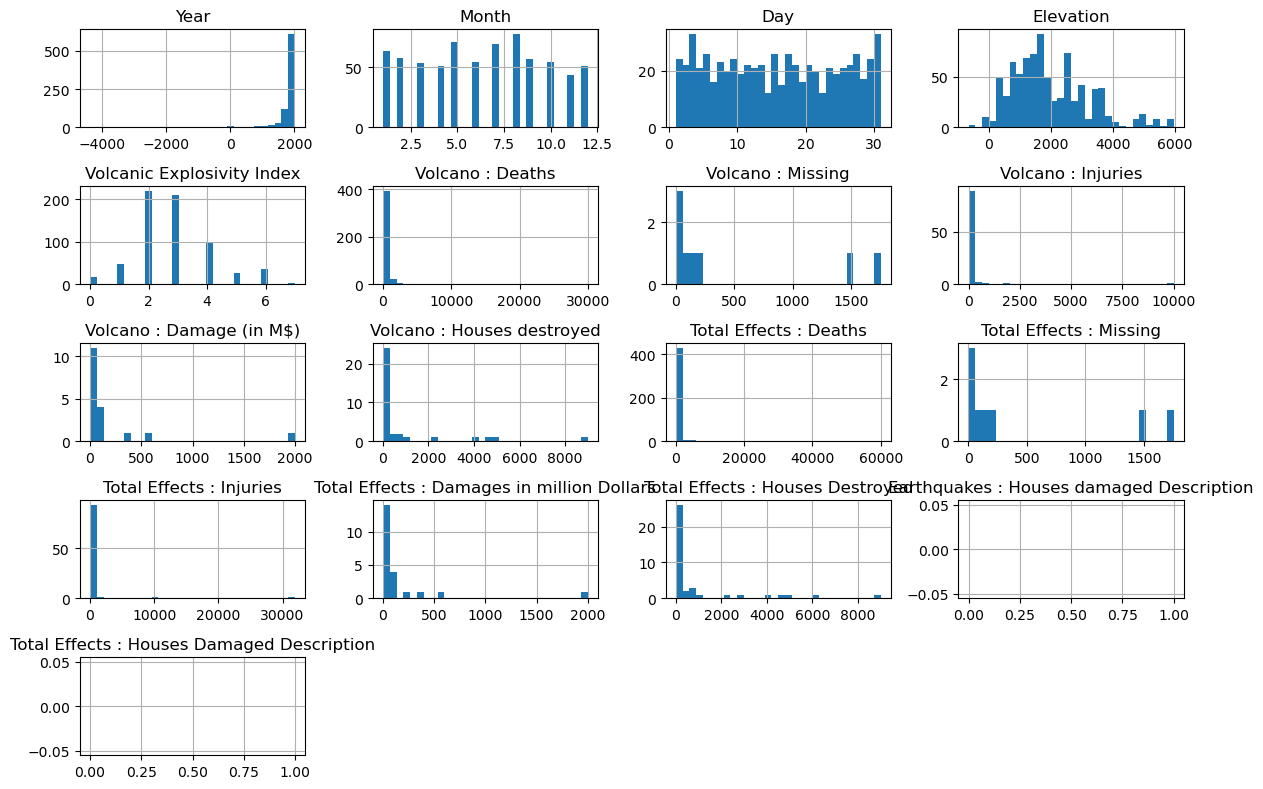

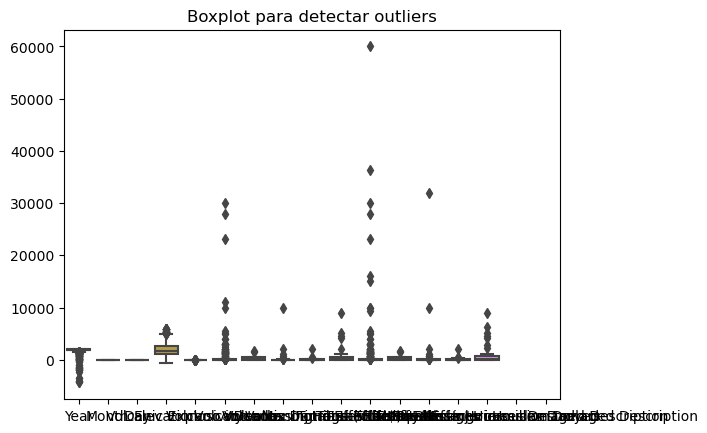

In [12]:
# Histograma de todas las columnas numéricas
df.hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()

# Boxplot para detectar outliers
sns.boxplot(data=df)
plt.title("Boxplot para detectar outliers")
plt.show()


In [25]:
# Valores únicos por columna
for col in df.columns:
    print(f"Columna: {col}")
    print(f"Valores únicos: {df[col].nunique()}")
    print(df[col].unique())
    print("\n")


Columna: Year
Valores únicos: 357
[ -141  1262  1300  1331  1714  1907  1911  1913  1944  1952  1960  1971
  1972  1979  1983  1984  1990  1991  1994  2007  2017  2018  2019  1593
  1609  1692  1718  1846  1866  1877  1883  1886  1896  1902  1914  1923
  1928  1947  1963  1965  1973  1974  1975  1982  1986  1992  1998  2004
  2008 -4050 -2420    79  1375  1376  1538  1664  1698  1775  1800  1822
  1840  1874  1916  1933  1953  1966  1969  1981  1993  2002  2011  2013
  2014 -1750   847   930  1158  1329  1510  1615  1617  1646  1677  1784
  1820  1827  1843  1847  1857  1870  1885  1897  1903  1932  1951  1995
  1999 -3550  1050  1177  1595  1598  1638  1659  1684  1693  1694  1794
  1816  1817  1825  1875  1889  1912  1961  1964  1976  1978 -4360 -4000
   -50    46   500   787  1536  1690  1726  1730  1742  1749  1848  1861
  1892  1919  1929  1939  1940  1957  1980  1989  2001   920  1104  1151
  1206  1485  1550  1576  1580  1772  1781  1826  1850  1858  1887  1890
  1936  1937  194

In [ ]:
# Verificar los tipos de datos en el DataFrame
print(df.dtypes)


Year                                              int64
Month                                           float64
Day                                             float64
Flag Tsunami                                     object
Flag Earthquake                                  object
Volcano Name                                     object
Location                                         object
Country                                          object
Elevation                                         int64
Volcano Type                                     object
Status                                           object
Volcanic Explosivity Index                      float64
Volcano : Deaths                                float64
Volcano : Deaths Description                     object
Volcano : Missing                               float64
Volcano : Missing Description                    object
Volcano : Injuries                              float64
Volcano : Injuries Description                  

In [29]:
# Revisar la columna problemática (por ejemplo, "Total Effects : Damages in million Dollars")
print(df['Total Effects : Damages in million Dollars'].unique())

[      nan 2.500e+00 4.000e+00 3.300e+00 3.564e+00 2.500e+02 1.400e+01
 8.600e+01 3.700e+02 2.000e+00 6.000e+02 1.000e+00 3.000e+00 1.000e+02
 2.400e+00 1.150e+02 6.700e+01 1.900e+01 5.000e+00 1.200e+02 2.000e+03
 1.450e+01 1.500e+01]
